In [3]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.0-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.0-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2

In [4]:
import seaborn as sns

In [5]:
tips = sns.load_dataset("tips")
tips.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

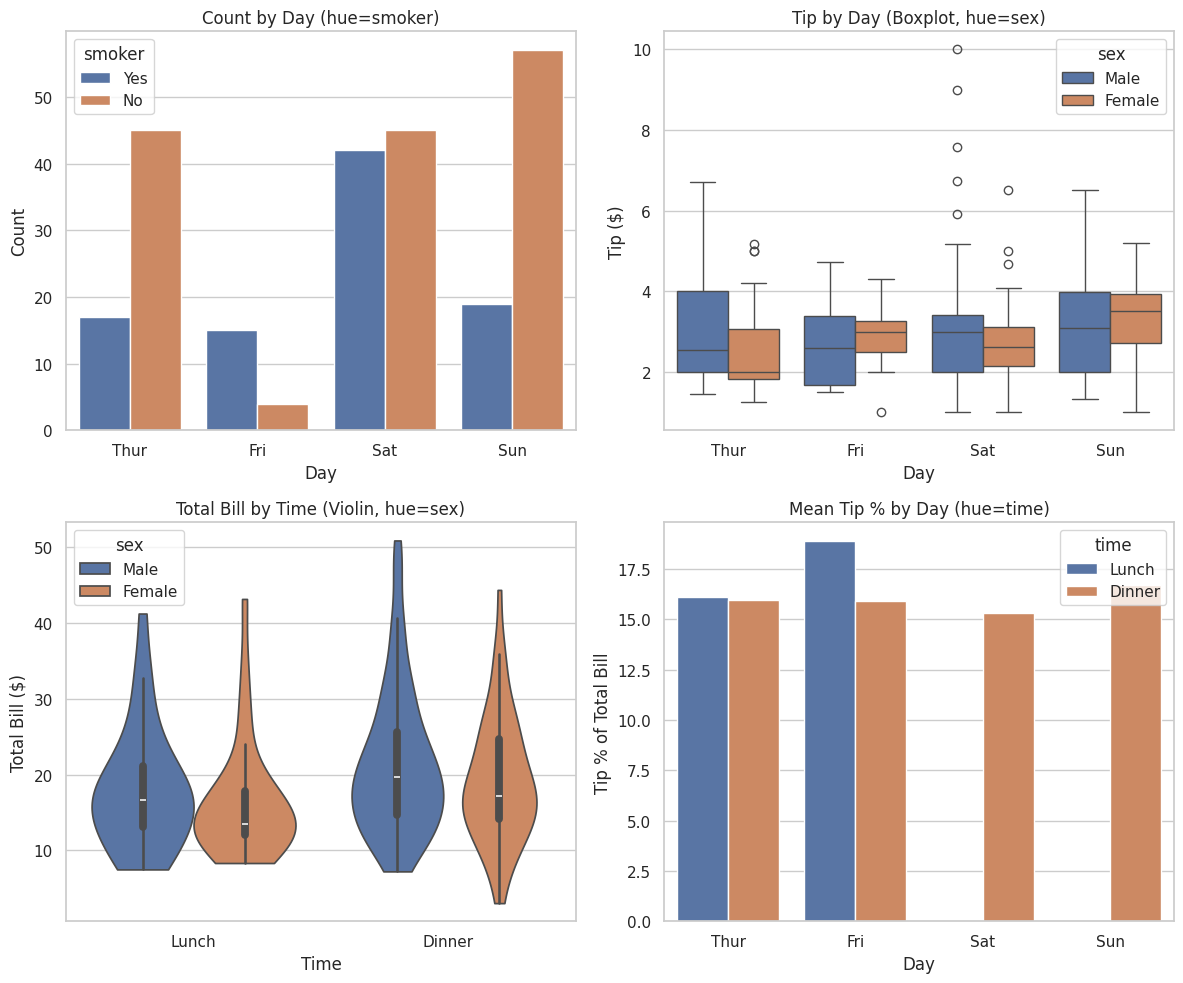

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 범주형 시각화 데모 (Seaborn tips 데이터셋)
sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips").dropna().copy()
tips["tip_pct"] = (tips["tip"] / tips["total_bill"]) * 100

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1) 요일별 방문 수 (흡연 여부 구분)
sns.countplot(data=tips, x="day", hue="smoker", ax=axes[0, 0])
axes[0, 0].set_title("Count by Day (hue=smoker)")
axes[0, 0].set_xlabel("Day")
axes[0, 0].set_ylabel("Count")

# 2) 요일별 팁 분포 (성별 구분, 상자그림)
sns.boxplot(data=tips, x="day", y="tip", hue="sex", ax=axes[0, 1])
axes[0, 1].set_title("Tip by Day (Boxplot, hue=sex)")
axes[0, 1].set_xlabel("Day")
axes[0, 1].set_ylabel("Tip ($)")

# 3) 식사 시간별 총 금액 분포 (바이올린)
sns.violinplot(data=tips, x="time", y="total_bill", hue="sex", ax=axes[1, 0], cut=0)
axes[1, 0].set_title("Total Bill by Time (Violin, hue=sex)")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Total Bill ($)")

# 4) 요일별 평균 팁 비율 (bar, 에러바 제거)
sns.barplot(data=tips, x="day", y="tip_pct", hue="time", ax=axes[1, 1], errorbar=None)
axes[1, 1].set_title("Mean Tip % by Day (hue=time)")
axes[1, 1].set_xlabel("Day")
axes[1, 1].set_ylabel("Tip % of Total Bill")

fig.tight_layout()
plt.show()


### 요일별 차이 분석 가이드

- **분석 지표 정의**: `tip_pct = tip / total_bill * 100`
- **요약표 산출 및 저장**: 요일별 건수(`n`), `total_bill`/`tip`/`tip_pct`의 평균·중앙값, 평균 인원(`size`), 흡연자 비율(`smoker_rate`), 점심 비율(`lunch_rate`)을 계산해 CSV로 저장.
- **권장 그래프**:
  - **Pointplot**: 요일별 평균 `tip_pct` (신뢰구간 포함), `hue=time`으로 Lunch/Dinner 차이 확인
  - **Box/Boxenplot**: 요일별 `tip_pct` 분포 비교
  - **Barplot(평균)**: 요일별 `total_bill`, `tip` 평균 비교(2개 서브플롯)
  - **100% Stacked Bar**: 요일별 흡연자 비율(Yes/No 비중) 비교
- **결과물 저장**:
  - 요약표: `data/exports/tips_daily_summary.csv`
  - 그래프: `data/plots/day_point_tip_pct.png`, `day_box_tip_pct.png`, `day_means.png`, `day_smoker_ratio.png`
- 필요시 ANOVA/Kruskal 등 검정도 추가 가능합니다.


In [ ]:
from pathlib import Path
import pandas as pd

# 작업 디렉토리(노트북이 실행되는 위치)
base_dir = Path.cwd()
export_dir = base_dir / "exports"
export_dir.mkdir(parents=True, exist_ok=True)

# 데이터 로드 및 전처리
tips = sns.load_dataset("tips").dropna().copy()
tips["tip_pct"] = (tips["tip"] / tips["total_bill"]) * 100
# 요일 순서를 고정(있을 경우에만)
order = ["Thur", "Fri", "Sat", "Sun"]
if set(order).issuperset(set(tips["day"].unique())):
    tips["day"] = pd.Categorical(tips["day"], categories=order, ordered=True)

# 요약표 계산
g = tips.assign(
    smoker_flag=tips["smoker"].eq("Yes").astype(int),
    lunch_flag=tips["time"].eq("Lunch").astype(int),
)
daily_summary = g.groupby("day", observed=True).agg(
    n=("total_bill", "size"),
    mean_total_bill=("total_bill", "mean"),
    median_total_bill=("total_bill", "median"),
    mean_tip=("tip", "mean"),
    median_tip=("tip", "median"),
    mean_tip_pct=("tip_pct", "mean"),
    median_tip_pct=("tip_pct", "median"),
    avg_party_size=("size", "mean"),
    smoker_rate=("smoker_flag", "mean"),
    lunch_rate=("lunch_flag", "mean"),
).reset_index()

# 보기 좋게 반올림
daily_summary = daily_summary.round({
    "mean_total_bill": 2, "median_total_bill": 2,
    "mean_tip": 2, "median_tip": 2,
    "mean_tip_pct": 2, "median_tip_pct": 2,
    "avg_party_size": 2, "smoker_rate": 3, "lunch_rate": 3,
})

# CSV 저장
csv_path = export_dir / "tips_daily_summary.csv"
daily_summary.to_csv(csv_path, index=False)
print(f"Saved summary: {csv_path}")

daily_summary


Saved summary: /home/perfect/dev/ai-training/data/exports/tips_daily_summary.csv


/tmp/ipykernel_1901538/2625834312.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_summary = g.groupby("day").agg(


,day,n,mean_total_bill,median_total_bill,mean_tip,median_tip,mean_tip_pct,median_tip_pct,avg_party_size,smoker_rate,lunch_rate
0,Thur,62,17.68,16.20,2.77,2.30,16.13,15.38,2.45,0.274,0.984
1,Fri,19,17.15,15.38,2.73,3.00,16.99,15.56,2.11,0.789,0.368
2,Sat,87,20.44,18.24,2.99,2.75,15.32,15.18,2.52,0.483,0.000
3,Sun,76,21.41,19.63,3.26,3.15,16.69,16.11,2.84,0.250,0.000


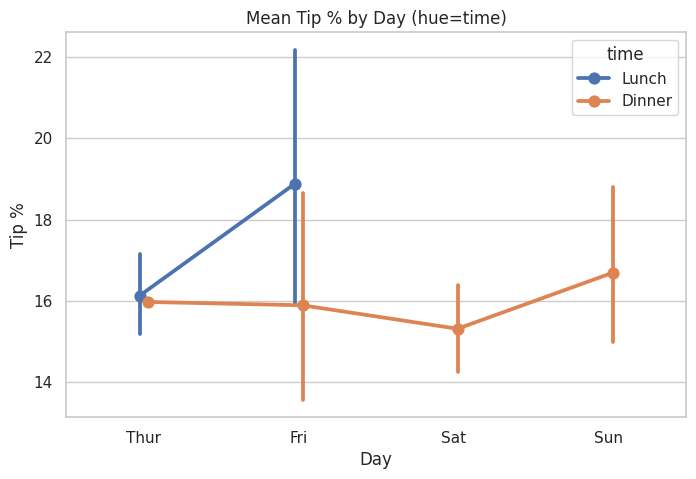

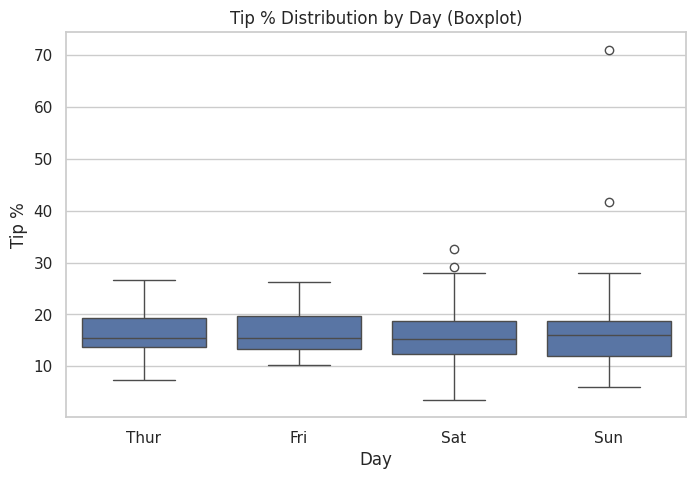

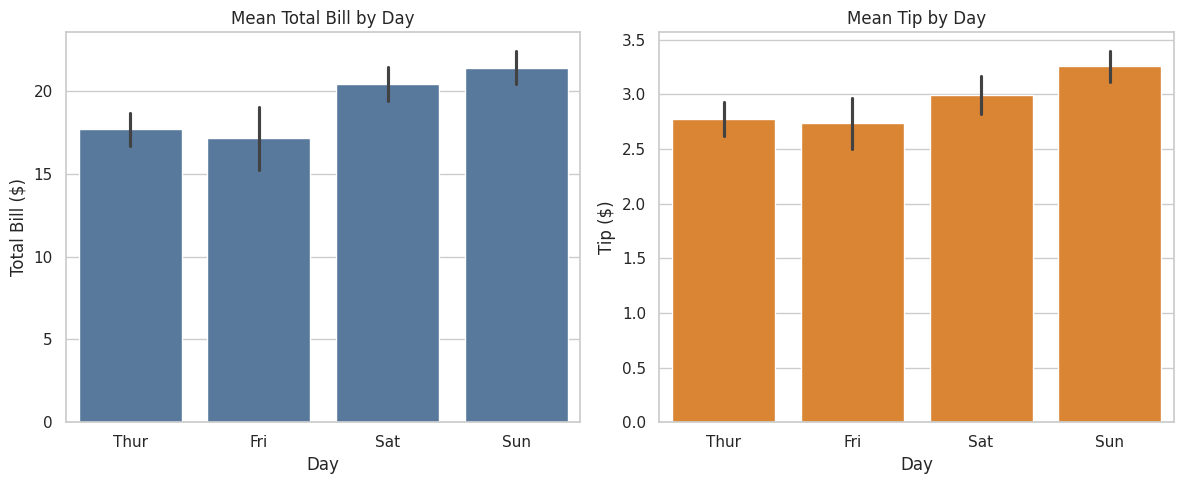

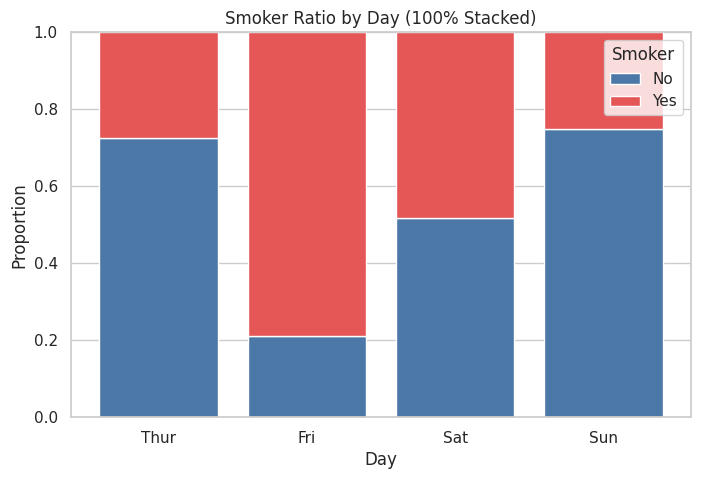

Saved plots:
/home/perfect/dev/ai-training/data/plots/day_point_tip_pct.png
/home/perfect/dev/ai-training/data/plots/day_box_tip_pct.png
/home/perfect/dev/ai-training/data/plots/day_means.png
/home/perfect/dev/ai-training/data/plots/day_smoker_ratio.png


In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")

base_dir = Path.cwd()
plot_dir = base_dir / "plots"
plot_dir.mkdir(parents=True, exist_ok=True)

# 데이터 준비
tips = sns.load_dataset("tips").dropna().copy()
tips["tip_pct"] = (tips["tip"] / tips["total_bill"]) * 100
order = ["Thur", "Fri", "Sat", "Sun"]
if set(order).issuperset(set(tips["day"].unique())):
    tips["day"] = pd.Categorical(tips["day"], categories=order, ordered=True)

saved = []

# 1) Pointplot: 요일별 평균 tip_pct (hue=time)
fig, ax = plt.subplots(figsize=(8, 5))
sns.pointplot(data=tips, x="day", y="tip_pct", hue="time", errorbar="ci", dodge=True, ax=ax)
ax.set_title("Mean Tip % by Day (hue=time)")
ax.set_xlabel("Day"); ax.set_ylabel("Tip %")
path = plot_dir / "day_point_tip_pct.png"
fig.savefig(path, bbox_inches="tight", dpi=150); plt.show(); plt.close(fig)
saved.append(path)

# 2) Boxplot: 요일별 tip_pct 분포
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=tips, x="day", y="tip_pct", ax=ax)
ax.set_title("Tip % Distribution by Day (Boxplot)")
ax.set_xlabel("Day"); ax.set_ylabel("Tip %")
path = plot_dir / "day_box_tip_pct.png"
fig.savefig(path, bbox_inches="tight", dpi=150); plt.show(); plt.close(fig)
saved.append(path)

# 3) Barplot: 요일별 평균 total_bill, tip (두 서브플롯)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.barplot(data=tips, x="day", y="total_bill", ax=axes[0], errorbar="se", color="#4C78A8")
axes[0].set_title("Mean Total Bill by Day"); axes[0].set_xlabel("Day"); axes[0].set_ylabel("Total Bill ($)")
sns.barplot(data=tips, x="day", y="tip", ax=axes[1], errorbar="se", color="#F58518")
axes[1].set_title("Mean Tip by Day"); axes[1].set_xlabel("Day"); axes[1].set_ylabel("Tip ($)")
fig.tight_layout()
path = plot_dir / "day_means.png"
fig.savefig(path, bbox_inches="tight", dpi=150); plt.show(); plt.close(fig)
saved.append(path)

# 4) 100% Stacked Bar: 요일별 흡연자 비율(Yes/No)
counts = tips.groupby(["day", "smoker"], observed=True).size().unstack(fill_value=0)
ratio = counts.div(counts.sum(axis=1), axis=0).reindex(index=order, columns=["Yes", "No"], fill_value=0)
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(ratio.index, ratio["No"], label="No", color="#4C78A8")
ax.bar(ratio.index, ratio["Yes"], bottom=ratio["No"], label="Yes", color="#E45756")
ax.set_ylim(0, 1)
ax.set_ylabel("Proportion")
ax.set_xlabel("Day")
ax.set_title("Smoker Ratio by Day (100% Stacked)")
ax.legend(title="Smoker")
path = plot_dir / "day_smoker_ratio.png"
fig.savefig(path, bbox_inches="tight", dpi=150); plt.show(); plt.close(fig)
saved.append(path)

print("Saved plots:")
for p in saved:
    print(p)
